<a href="https://colab.research.google.com/github/hsn-baqshi/car_diagnostics/blob/main/Car_Diagnostics_Q50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split
# Import Pandas and Numpy
import pandas as pd
import numpy as np
# Import LabelEncoder for preprocessing
from sklearn.preprocessing import LabelEncoder
# Import KNN
from sklearn.neighbors import KNeighborsClassifier
# Import plot
import matplotlib.pyplot as plt
# Import Linear Regression
from sklearn.linear_model import LinearRegression
# Import Lasso
from sklearn.linear_model import Lasso
# Import scaler
from sklearn.preprocessing import StandardScaler
# Imprt Decision Tree and Logistic Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Import cross_val
from sklearn.model_selection import *
# Import stats
from scipy.stats import poisson
# Import Seaborn
import seaborn as sns
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
# Import Pipeline
from sklearn.pipeline import make_pipeline
# Import normalize
from sklearn.preprocessing import normalize
# Import kmeans
from sklearn.cluster import KMeans
# Import File
from google.colab import files
# Import Linkage and Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
# Import TSNE
from sklearn.manifold import TSNE

In [ ]:

# create an upload file variable

uploaded = files.upload()

#upload the file into df2

import io
df2 = pd.read_csv(io.BytesIO(uploaded['Q50_data.csv']), parse_dates = ["Time"])


Saving Q50_data.csv to Q50_data.csv


In [ ]:
#Adding power

df2['Power (HP)'] = 0.141* df2[list(df2.columns)[4]]*df2[list(df2.columns)[8]]

#Removing Repeated Columns vvv

df2.drop([list(df2.columns)[5],list(df2.columns)[6],list(df2.columns)[7]], axis=1)

#Normalizing df2 data into norm_df2 vvvv

norm_df2 = pd.DataFrame()
for i in range(len(list(df2.columns))):
  norm_df2[ list(df2.columns)[i] ] = ( df2[list(df2.columns)[i]] - min( df2[list(df2.columns)[i]] ) ) / ( max( df2[list(df2.columns)[i]] ) - min( df2[list(df2.columns)[i]] ) )


df3 = df2

In [ ]:

df2 = df2.drop(df2.index[range(1000)])
#df2 = df2.loc[(df2[list(df2.columns)[1]] > 80) & (df2[list(df2.columns)[5]] > 5)]

norm_df2 = pd.DataFrame(norm_df2)

In [ ]:
## TAKES TOO LONG ## Plotting the data on one graph

for i in np.arange(1,len(list(df2.columns))-1):
  sns.lineplot(x = "Time", y = list(norm_df2.columns)[i], data = norm_df2, label = list(norm_df2.columns)[i])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Car Parameters vs Time")
plt.xticks(rotation = 20)
plt.show()


Engine coolant temperature (°C)


In [ ]:
#Plotting the figures seasonally

fig = plt.figure(figsize=(20,30))
myVars = vars()

for i in np.arange(1,len(list(df2.columns))):

  myVars['ax'+str(i)] = fig.add_subplot(len(list(df2.columns))-1,1,i, ylabel = list(df2.columns)[i] )
  myVars['ax'+str(i)].plot(df2["Time"], df2[list(df2.columns)[i] ])


plt.show()

In [ ]:
#### Clustering using KMeans

X = df2.drop("Time", axis=1).values

ks = range(1, 30)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)



# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3 )
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(X)


labels = pipeline.predict(X)

# creating a dataframe of the predicted labels and actual categories
lf = pd.DataFrame({'labels': labels, 'features': df2[list(df2.columns)[1]]})

# Cross-tabulation of the predicted features vs actual categories
ct = pd.crosstab(lf['labels'],lf['features'])
print(ct)

print(len(labels))

# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


xs = X[:,1]
ys = X[:,2]
plt.scatter(xs,ys,c=labels)
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()



In [ ]:
## Showing Heirarchy Method

X = df2.drop("Time", axis=1).values


# Normalize the data: normalized_movements
normalized_X = normalize(X)

# Calculate the linkage: mergings
mergings = linkage(normalized_X,method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=labels,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


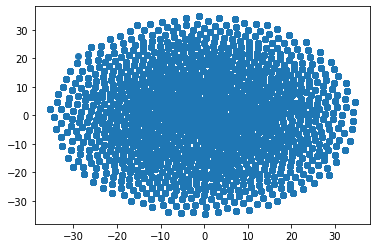

In [ ]:
##### Clustering using TSNE

X = df2.drop("Time", axis=1).values

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys)
plt.show()


In [ ]:
df2[:,1]

NameError: ignored